<div style="text-align: right"> Christopher Hyek <br> 7/21/2019 </div>

# <center> Module 3 Project </center>
## <center> 1994 Census Data </center>

# Index

[**Introduction**](#Introduction)
* Directory
* Imports

[**Methodology**](#Methodology)
* Explanation
* Goal

[**EDA**](#EDA)
* Process
* Clean
* Visualize
* Form Questions
* Test Models

[**Question**](#Question)
* Why was it chosen
* Goals
* Process
* Results

[**Conlusion**](#Conclusion)
* Next Steps
* Recommendations

# Introduction

Today we're going to be looking over a dataset created by Barry Becker pertaining to the 1994 Census for the United States. 

### Purpose
What we're going to be figuring out with it initially is whether or not that people make over $50,000 or under that per year with the information that we obtain with the initial data. This will help us provide answers to our hypothetical employee-the government-to better tax the people by predicting their tax brackets based on their information. Which in turn may help them through more knowledgable tax policies.

Then we're going to come up with an additional question and apply it to the same data and see where that takes us.

#### Directory and Imports

Below this you'll find me checking/resetting the directory and then making sure we are in the correct area where I stored the CSV files. Following this is the imports that were used for this project.

In [1]:
cd

C:\Users\Atlas


In [2]:
cd Module 3

C:\Users\Atlas\Module 3


In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

from itertools import combinations
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Methodology

Below is the order in which we'll be covering our datasets so that we can find trends or spot issues before asking deeper questions.

    1. Run CSV files and check for issues
    2. Clean each CSV of null values
    3. Remove any redundant/low value columns 
    4. Begin to formulate questions through visualization
    5. Determine several questions that can utilize classification algorithms
    6. Perform cursory tests pertaining to the questions
    7. Reduce list as needed until few questions remain

### Dataframe creation and column naming

After collecting both the test and training data I had to run them to check for any immediate issues before we continued.

In [4]:
df0 = pd.read_csv('adult.csv')
df1 = pd.read_csv('adult_test.csv')

In [5]:
df0.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df1.head()

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


First issue I spot with both of these dataframes are that their column names are wrong and they both have their unique ID columns showing. While I think I'll keep the unique ID showing because it can be helpful at times I will be fixing the column names and then recreating the dataframes.

I went back to the dataset download location and pullled the attribute names that the creator had originally provided and put them into a list then re-ran the first dataframe to have no header so that the row used in the beginning would return as a row of data.

In [7]:
df0 = pd.read_csv('adult.csv', header=None)
df1 = pd.read_csv('adult_test.csv', header=None)

In [8]:
headers = ['age', 'work_class', 'fnlwgt', 'education', 'education_num', 'martial_status', 'occupation', 'relationship', \
          'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'annual_salary']

In [9]:
df0.columns = headers

In [10]:
df0.head()

,age,work_class,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
df1.columns = headers

In [12]:
df1.head()

,age,work_class,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


# EDA

In [13]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
work_class        32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
martial_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
annual_salary     32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Checking for null values and inconsistency

Now that we have the dataframes properly working we're going to move on to checking them for issues such as null values, mislabeled values, or serious outliers. 

Once we locate anything like this we'll clean up the null and mislabeled values and then consider our options with the outliers when we get to feature engineering.

In [14]:
for i in headers:
    print(i + '\n')
    print(df0[i].unique())
    print('\n' + '\n')

age

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]



work_class

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']



fnlwgt

[ 77516  83311 215646 ...  34066  84661 257302]



education

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']



education_num

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]



martial_status

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']



occupation

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Fa

In [15]:
df0.isna().sum()

age               0
work_class        0
fnlwgt            0
education         0
education_num     0
martial_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
annual_salary     0
dtype: int64

In [16]:
for i in headers:
    print(i + '\n')
    print(df1[i].unique())
    print('\n' + '\n')

age

[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87]



work_class

[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']



fnlwgt

[226802  89814 336951 ... 349230 321403  83891]



education

[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool']



education_num

[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]



martial_status

[' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']



occupation

[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-ma

In [17]:
df1.isna().sum()

age               0
work_class        0
fnlwgt            0
education         0
education_num     0
martial_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
annual_salary     0
dtype: int64

#### Review of each column

First and foremost since we are working with a test and train set we already know that they're going to share similar issues so I will be cleaning both up at the same time. 

* <b>Age</b>
<br>    No issues. 

    Going over the ages it seems that everyone put into it are 18 or older but considering there are over 30K entries I would have thought every age would be covered from 18 onwards but that's not an issue. 
    

* <b>Working Classifications</b>
<br>    Some label issues. 
    
    For those who are not familiar with how self employment work they may not know the difference between being incorporated or unincorporated. Incorporated Self Employment refers to people who work for themselves in a corporate entity--similar to contract work. While Unincorporated Self Employment refers to one who works for themselves in other legal entities.
    
    There are also some people listed as without-pay and ?. The first group probably implies those who are on leave and without pay during said leave or those who are on probation. The other just means that they are not sure of their legal working status so we'll be changing those ones to another name to keep things easier to understand. There are also spaces at the front of each label that will be removed.
    

* <b>Final Weight</b>
<br>    Some readability issues.

    No real information was given in the attribute information tab of the data so I had to dig around on this one. It turns out that this has to do with Survey of Income and Program Participation (SIPP) and it's used to help deal with biases found within the data. 
    
    While this information is probably helpful for those who know more about census data and how to extrapolate information from this, I am not one of those people so I will be dropping this column.
   

* <b>Education</b>
<br>    Some label issues.

    At first glance this column and the following seem redundant. However the next one does not mark the year the person went to school to so most of the working names for this group were just provided numerical entries in the next colunn. 
    
    After going through them it became clear that they were meant to order the columns education system for legibility. However there are spaces at the front of each variable that I'll be removing.


* <b>Education Number</b>
<br>    No issues.

    The following column has nothing to do with what year you stopped going to schoool. These are just identifiers for the 'Education' column.


* <b>Martial Status</b>
<br>    Some readability issues and label issues.

    Most of the labels are self-explanatory but the one labeled 'Married-AF-Spouse' does not mean 'married-as-f%#&-spouse', it means 'Married-Armed-Forces-spouse'. For the sake of clarity and the joke I wanted to make sure everyone knew the difference going forward.
    
    There are also spaces in front of each of these options too.


* <b>Occupation</b>
<br>    Some label issues.

    The column was clean minus the '?' data which I initially thought to move to 'Other-service' option since they seem to be within the same group but it may refer to 'No-occupation' which is not an option either so I'll need to look into it further.
    
    There are also space in front of each option.


* <b>Relationship</b>
<br>    Some label issues.

    The labels themselves are fine but they have uneccessary spaces in the front again.


* <b>Race</b>
<br>    Some label issues.

    There are spaces in front that need to be removed. On top of that this information will be highly skewed since it does not represent many ethnic groups that should be listed. 


* <b>Sex</b>
<br>    Some label issues.

    The labels have spaces in front of them.
    

* <b>Capital Gains</b>
<br>    Some potential issues.

    This means income outside of your wage/salary. 
    
    But what may be an issues is if someone reports a number in this column and the Capital Losses column and one of them isn't '0'. That means there is inconsistency in their reporting.


* <b>Capital Losses</b>
<br>    Some potential issues.

    This means loss of income outside of your wage/salary. 
    
    The issue is liste in the Capital Gains column review.


* <b>Hours Worked per Week</b>
<br>    Some potential issues.

    After scanning the answers it seems taht no answer on there was a '?' or '0' but the people who don't have jobs had to have put something down so this information may be skewed on what people classify as working.



* <b>Native Country</b>
<br>    Some label issues.

    There are the constant spaces problem that the entire dataset is riddled with but there is also one smaller mistake in that Hong Kong is just listed as Hong. 


* <b>Annual Salary</b>
<br>   Some label issues.

    There are spaces in front of the options.

### Cleaning the Data

Now that we have the review of each column out of the way, we now know what we need to fix up and get corrected or inspected. This makes the cleaning process that much easier.

And since we know that there are a serious number of extra spaces found in a majority of columns we're going to make a simple loop to clean those out before we clean each column.

#### Fixing all of the space issues

First thing I need to do is make sure that I make an array that only has string columns in it. Since those are the ones with the issues.

In [18]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
work_class        32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
martial_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
annual_salary     32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
df0.columns

Index(['age', 'work_class', 'fnlwgt', 'education', 'education_num',
       'martial_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'annual_salary'],
      dtype='object')

In [20]:
# This list is used to collect all string columns so we can strip them of spaces

no_str_headers = ['work_class', 'education', 'martial_status', 'occupation', 'relationship', 'race', 'sex', \
                  'native_country', 'annual_salary']

In [21]:
# This list checks every column minus fnlwgt which is removed later on.

headers_wo = ['age', 'work_class', 'education', 'education_num', 'martial_status', 'occupation', 'relationship', \
          'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'annual_salary']

In [22]:
# This removes spaces from all of the string columns

for i in no_str_headers:
    df0[i] = df0[i].str.strip()
    df1[i] = df1[i].str.strip()

In [23]:
# This was used to check for spaces afer running the for loop

for i in headers_wo:
    print(i + '\n')
    print(df0[i].unique())
    print('\n' + '\n')

age

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]



work_class

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']



education

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']



education_num

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]



martial_status

['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']



occupation

['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-

Now that we have no more spaces throughout both df0 and df1 datasets we can move on to the other issues found.

In [24]:
# work_class

df0['work_class'] = df0['work_class'].replace(to_replace = '?', value = 'Unknown')
df1['work_class'] = df1['work_class'].replace(to_replace = '?', value = 'Unknown')

# fnlwgt

df0.drop(['fnlwgt'], axis = 1, inplace = True)
df1.drop(['fnlwgt'], axis = 1, inplace = True)

# occupation

df0['occupation'] = df0['occupation'].replace(to_replace = '?', value = 'Unemployed/Never-Worked')
df1['occupation'] = df1['occupation'].replace(to_replace = '?', value = 'Unemployed/Never-Worked')

# native_country

df0['native_country'] = df0['native_country'].replace(to_replace = 'Hong', value = 'Hong-Kong')
df1['native_country'] = df1['native_country'].replace(to_replace = 'Hong', value = 'Hong-Kong')

In [25]:
# Used to check if there are both integers that are not 0 in both categories since these are meant to be complimentary columns

# df0.loc[(df0.capital_gain != 0) & (df0.capital_loss != 0)]

# df1.loc[(df1.capital_gain != 0) & (df1.capital_loss != 0)]

#### Final Remarks with cleaning

Now that we have cleaned up and gone through any issue the data could have we should make sure that we won't mess up the original data anymore. We're going to copy them into new dataframe names so we will be able to restart from those if anything were to happen. 

After we copy them over we're going to do one final check to make sure that we covered all of the scrubbing that we had listed.

### Data Visualization

We really didn't get an idea of if there are any outliers within the data from the cleaning so the first thing I want to do is go over every column for any extreme outliers.

In [26]:
print('Total DataFrame')
print(df0.describe())
print('\n \n')
print('Validation DataFrame')
print(df1.describe())

Total DataFrame
                age  education_num  capital_gain  capital_loss  hours_per_week
count  32561.000000   32561.000000  32561.000000  32561.000000    32561.000000
mean      38.581647      10.080679   1077.648844     87.303830       40.437456
std       13.640433       2.572720   7385.292085    402.960219       12.347429
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       48.000000      12.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000

 

Validation DataFrame
                age  education_num  capital_gain  capital_loss  hours_per_week
count  16281.000000   16281.000000  16281.000000  16281.000000    16281.000000
mean      38.767459      10.072907   1081.905104     87.899269       40.392236
std       1

Well the quick rundown of these two dataframes are that their descriptions are pretty much the same minus the sample size. There is a huge discrepancy with capital gain, capital loss, and hours per week so we're going to check that for outliers below.

### Outliers

Here is a quick class made up to get the upper and lower limit of any standard deviation and it will also provide the max and min of the column to give us reference.

In [27]:
def outlier_check(df, x):
    factor = x
    upper_limit = 0
    lower_limit = 0
    upper_limit = df.mean() + df.std() * factor
    lower_limit = df.mean() - df.std() * factor
    print('Upper Limit: ')
    print(upper_limit)
    print('Lower Limit: ')
    print(lower_limit)
    print('Max: ')
    print(df.max())
    print('Min: ')
    print(df.min())

In order to make it look very clean we're going to do all three in one batch at a standard deviation of 3.

In [28]:
print('capital_gain')
print(outlier_check(df0['capital_gain'], 3))
print('\n' + '-' * 50 + '\n')
print('capital_loss')
print(outlier_check(df0['capital_loss'], 3))
print('\n' + '-' * 50 + '\n')
print('hours_per_week')
print(outlier_check(df0['hours_per_week'], 3))

capital_gain
Upper Limit: 
23233.525098229748
Lower Limit: 
-21078.227410812284
Max: 
99999
Min: 
0
None

--------------------------------------------------

capital_loss
Upper Limit: 
1296.1844856819584
Lower Limit: 
-1121.5768262120405
Max: 
4356
Min: 
0
None

--------------------------------------------------

hours_per_week
Upper Limit: 
77.47974189728853
Lower Limit: 
3.3951698068974636
Max: 
99
Min: 
1
None


In [29]:
print('capital_gain')
print(outlier_check(df1['capital_gain'], 3))
print('\n' + '-' * 50 + '\n')
print('capital_loss')
print(outlier_check(df1['capital_loss'], 3))
print('\n' + '-' * 50 + '\n')
print('hours_per_week')
print(outlier_check(df1['hours_per_week'], 3))

capital_gain
Upper Limit: 
23833.71300777034
Lower Limit: 
-21669.90279955217
Max: 
99999
Min: 
0
None

--------------------------------------------------

capital_loss
Upper Limit: 
1297.2151259746092
Lower Limit: 
-1121.4165878012782
Max: 
3770
Min: 
0
None

--------------------------------------------------

hours_per_week
Upper Limit: 
77.83023309045542
Lower Limit: 
2.954239607781787
Max: 
99
Min: 
1
None


#### Results of the outlier checks

Well that's not good! It seems that our lower limits are much further below our minimum so that means we should normalize our data since this means we have data inequality.

In [30]:
# This is done so we don't get infinite values when we log the data.

df01 = df0.copy()

df01['capital_gain'] = df01['capital_gain'].replace(to_replace = 0, value = 1)
df01['capital_loss'] = df01['capital_loss'].replace(to_replace = 0, value = 1)

In [31]:
df_log_cg = np.log(df01.capital_gain)
df_log_cl = np.log(df01.capital_loss)
df_log_hpw = np.log(df01.hours_per_week)

In [32]:
print('capital_gain')
print(outlier_check(df_log_cg, 3))
print('\n' + '-' * 50 + '\n')
print('capital_loss')
print(outlier_check(df_log_cl, 3))
print('\n' + '-' * 50 + '\n')
print('hours_per_week')
print(outlier_check(df_log_hpw, 3))

capital_gain
Upper Limit: 
8.098640206342186
Lower Limit: 
-6.629438907823515
Max: 
11.512915464920228
Min: 
0.0
None

--------------------------------------------------

capital_loss
Upper Limit: 
5.10366310071526
Lower Limit: 
-4.403106723030464
Max: 
8.37930948405285
Min: 
0.0
None

--------------------------------------------------

hours_per_week
Upper Limit: 
4.866313439666777
Lower Limit: 
2.40570152974267
Max: 
4.59511985013459
Min: 
0.0
None


It seems that even if we were to normalize the data that there is still a serious inequality within the data. Let's check how many points in each column go beyond the 3rd standard deviation using the data that isn't logged.

In [33]:
print(df0.loc[(df0.capital_gain >= 23233) | (df0.capital_gain <= -21078)].count())
print('\n')
print(df0.loc[(df0.capital_loss >= 1296) | (df0.capital_loss <= -1121)].count())
print('\n')
print(df0.loc[(df0.hours_per_week >= 77) | (df0.hours_per_week <= 3)].count())

age               215
work_class        215
education         215
education_num     215
martial_status    215
occupation        215
relationship      215
race              215
sex               215
capital_gain      215
capital_loss      215
hours_per_week    215
native_country    215
annual_salary     215
dtype: int64


age               1470
work_class        1470
education         1470
education_num     1470
martial_status    1470
occupation        1470
relationship      1470
race              1470
sex               1470
capital_gain      1470
capital_loss      1470
hours_per_week    1470
native_country    1470
annual_salary     1470
dtype: int64


age               446
work_class        446
education         446
education_num     446
martial_status    446
occupation        446
relationship      446
race              446
sex               446
capital_gain      446
capital_loss      446
hours_per_week    446
native_country    446
annual_salary     446
dtype: int64


In [34]:
print(df1.loc[(df1.capital_gain >= 23833) | (df1.capital_gain <= -21669)].count())
print('\n')
print(df1.loc[(df1.capital_loss >= 1297) | (df1.capital_loss <= -1121)].count())
print('\n')
print(df1.loc[(df1.hours_per_week >= 77) | (df1.hours_per_week <= 3)].count())

age               116
work_class        116
education         116
education_num     116
martial_status    116
occupation        116
relationship      116
race              116
sex               116
capital_gain      116
capital_loss      116
hours_per_week    116
native_country    116
annual_salary     116
dtype: int64


age               746
work_class        746
education         746
education_num     746
martial_status    746
occupation        746
relationship      746
race              746
sex               746
capital_gain      746
capital_loss      746
hours_per_week    746
native_country    746
annual_salary     746
dtype: int64


age               244
work_class        244
education         244
education_num     244
martial_status    244
occupation        244
relationship      244
race              244
sex               244
capital_gain      244
capital_loss      244
hours_per_week    244
native_country    244
annual_salary     244
dtype: int64


Well it seems that capital_loss has the most outliers by a large margin with almost 5% of the entire dataset being beyond the third standard deviation while the other two barely make up 2% or less.

#### What to do with these outliers?

Well we have a few options:

    1. We could remove/change all outliers from 3rd standard deviation
    2. We could see what our quesiton is to see if we even need to mess around with these columns
    
The answer that I ended up choosing is in post production. I know after finishing the project that removing the outliers will improve the data set so I will be doing that below for the sake of not having the project be even longer. 

#### Removing the Outliers

In [35]:
rocg0 = df0.loc[(df0.capital_gain >= 1300) | (df0.capital_loss <= -1100)].index
df0.drop(rocg0, inplace = True)
rocl0 = df0.loc[(df0.capital_loss >= 1300) | (df0.capital_loss <= -1100)].index
df0.drop(rocl0, inplace = True)
rohpw0 = df0.loc[(df0.hours_per_week >= 77) | (df0.hours_per_week <= 3)].index
df0.drop(rohpw0, inplace = True)

In [36]:
rocg1 = df1.loc[(df1.capital_gain >= 23833) | (df1.capital_gain <= -21669)].index
df1.drop(rocg1, inplace = True)
rocl1 = df1.loc[(df1.capital_loss >= 1297) | (df1.capital_loss <= -1121)].index
df1.drop(rocl1, inplace = True)
rohpw1 = df1.loc[(df1.hours_per_week >= 77) | (df1.hours_per_week <= 3)].index
df1.drop(rohpw1, inplace = True)

In [37]:
print('capital_gain')
print(outlier_check(df0['capital_gain'], 3))
print('\n' + '-' * 50 + '\n')
print('capital_loss')
print(outlier_check(df0['capital_loss'], 3))
print('\n' + '-' * 50 + '\n')
print('hours_per_week')
print(outlier_check(df0['hours_per_week'], 3))

capital_gain
Upper Limit: 
154.95878699256804
Lower Limit: 
-149.36997799420539
Max: 
1173
Min: 
0
None

--------------------------------------------------

capital_loss
Upper Limit: 
102.39767324990615
Lower Limit: 
-99.82965160827447
Max: 
1258
Min: 
0
None

--------------------------------------------------

hours_per_week
Upper Limit: 
73.11457064834062
Lower Limit: 
6.008872079644
Max: 
76
Min: 
4
None


In [38]:
print('capital_gain')
print(outlier_check(df1['capital_gain'], 3))
print('\n' + '-' * 50 + '\n')
print('capital_loss')
print(outlier_check(df1['capital_loss'], 3))
print('\n' + '-' * 50 + '\n')
print('hours_per_week')
print(outlier_check(df1['hours_per_week'], 3))

capital_gain
Upper Limit: 
7209.520004845399
Lower Limit: 
-6144.057717100237
Max: 
20051
Min: 
0
None

--------------------------------------------------

capital_loss
Upper Limit: 
89.15466497325778
Lower Limit: 
-87.3385533502487
Max: 
1258
Min: 
0
None

--------------------------------------------------

hours_per_week
Upper Limit: 
73.34967378903688
Lower Limit: 
6.096028461851617
Max: 
76
Min: 
4
None


#### Results

Wow these have gone down quite a bit now that we removed all of the outliers past the third standard deviation! While not perfect still they are definitely doing far better than they were previously! And now we'll use this data for the remainder of the project!

### Scatter Matrix and Correlation Heatmaps

Let's make a scatter matrix to see what we're looking at with the dat when we couple the numerical columns together.

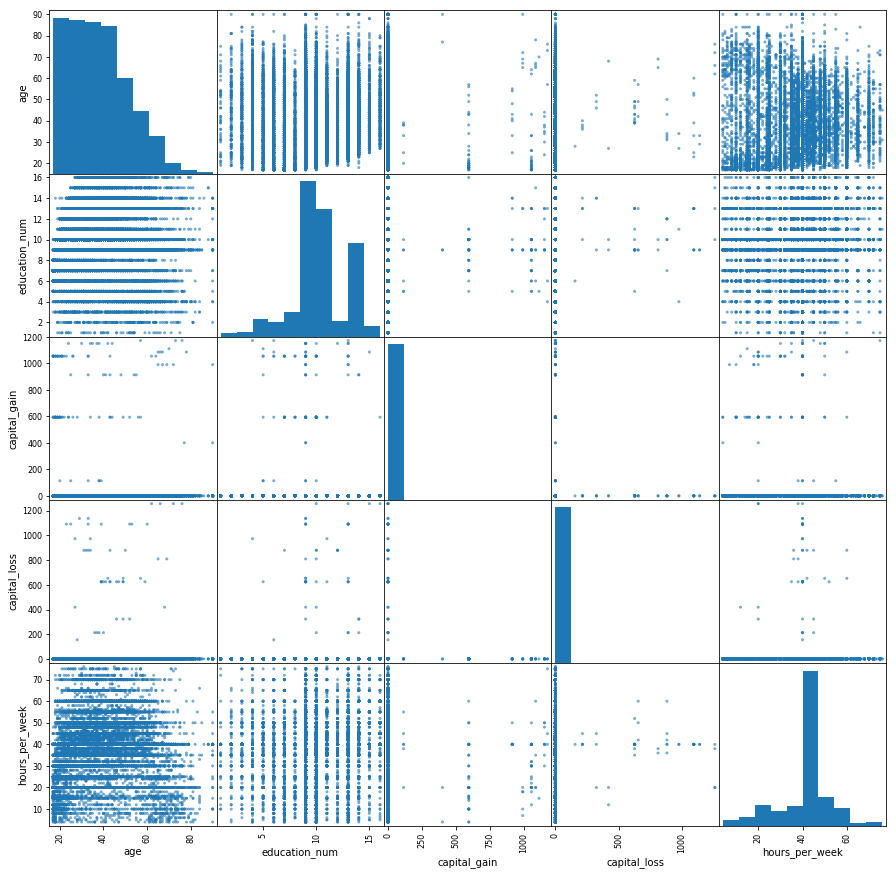

In [39]:
pd.plotting.scatter_matrix(df0, alpha=0.6, figsize=(15, 15))
plt.show()

This does very little for my ability to read each graph but it does give me an idea to checkk a correlation heatmap to get numbers put to each of these scatter plots.

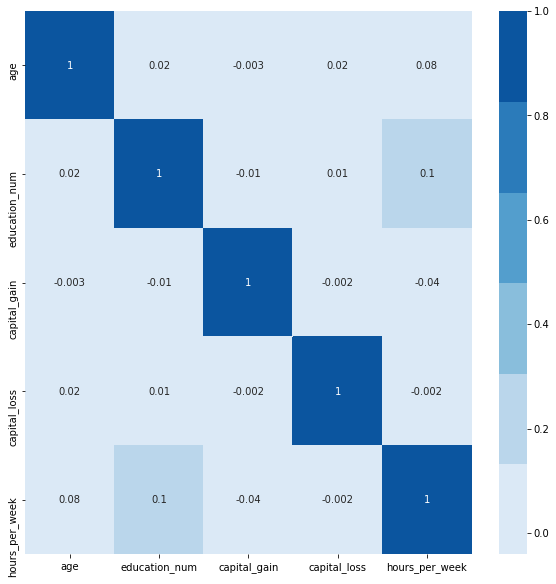

In [40]:
corr = df0.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt='0.1g', cmap=sns.color_palette('Blues'))
plt.show()

The very stark answer we have here is that aside from the ones that are 1 to 1 ratios (which are the data compared to themself) there is virtually no correlation between any of these columns. 

## Visualize the graphs

Since we have only seen the scatter matrix so far lets look at the data when put to a distplot.

In [41]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28094 entries, 1 to 32559
Data columns (total 14 columns):
age               28094 non-null int64
work_class        28094 non-null object
education         28094 non-null object
education_num     28094 non-null int64
martial_status    28094 non-null object
occupation        28094 non-null object
relationship      28094 non-null object
race              28094 non-null object
sex               28094 non-null object
capital_gain      28094 non-null int64
capital_loss      28094 non-null int64
hours_per_week    28094 non-null int64
native_country    28094 non-null object
annual_salary     28094 non-null object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [42]:
df_mapper = df0.copy()

In [43]:
df_mapper.drop(['work_class', 'education', 'martial_status', 'occupation', 'relationship', 'race', 'sex', \
                'native_country', 'annual_salary'], axis=1, inplace=True)


In [44]:
df_mapper.columns

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [45]:
df_mapper_headers = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

#### Non-logged Visualizations

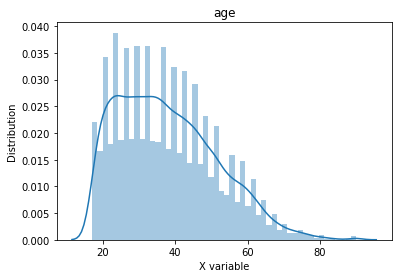

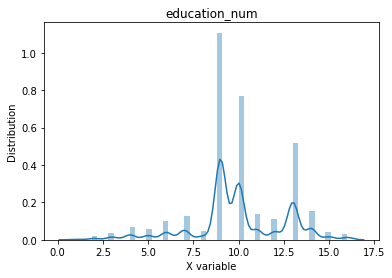

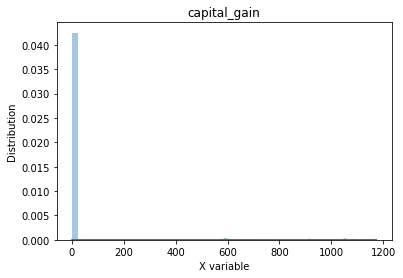

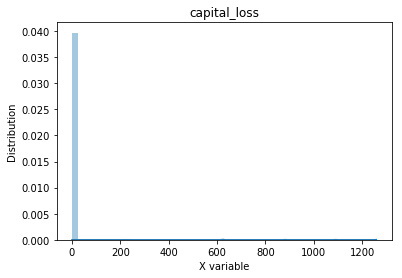

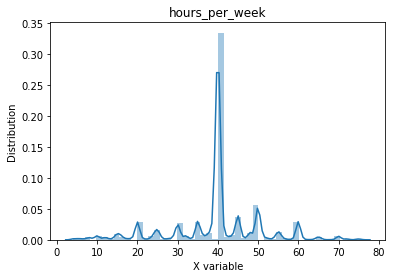

In [46]:
for i, col in enumerate(df_mapper.columns):
    plt.figure(i)
    a = sns.distplot(df_mapper[col])
    a.set_title(df_mapper_headers[i])
    a.set_ylabel('Distribution')
    a.set_xlabel('X variable')

Those look pretty rough, for the most part it seems that a majority of the numerical columns have a stark 'answer' that everyone has ith a few people having anything else.

### Visualization Results and final remarks

Well the log transformations did help a few with their overall look when I tested those but the data even with that the data is heavily skewed and not very equally distributed even after removing any outlier past the third standard deviation. 

For the most part this data is rough and very real but we're going to try and focus on what we can get from this information and below I'm going to bring up a few questions that I have thought of.

### Potential Questions

There are a few options that we have for positive questions that we can form with machine learning techniques and classification algorithms from this dataset.

    1. Logistic Regression on annual salary or sex.
        * Either would be a solid option to predict things with from an academic standpoint
    2. Decision Trees on race, sex, relationship, occupation, etc
        * These ccould be fun but it would be very time consuming
    3. Random Forst of the same topics in option 2.
        * This would be a much more complex and even slower option but would be interesting to do.

## Question

I think that the most attainable information that would be helpful to my potential employer would be the first option with a logistic regression model checking their annual salary. 

The reason I think this model would be the one that would help the most is that my would-be employer is the government and they're wanting to check the people within the census on what tax bracket they should be in (however for the simplicity of the columns it would be 50K+ or below 50K). And we'll check this through the implementation of machine learning algorithms on all other numeric columns.

### How to go about this

First thing we're going to do is create a bunch of dummy variables from columns that we currently have that can be easily broken down into dummies. We'll avoid columns that already are redundant like education_num and just use education instead.

In [47]:
# We're going to dumify these variables

x_feats = ['work_class', 'education', 'martial_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


# These ones we are changing to integers, 1 means over 50K, 0 means under 50K

df0['annual_salary'] = df0['annual_salary'].replace(to_replace = '>50K', value = '1')
df0['annual_salary'] = df0['annual_salary'].replace(to_replace = '<=50K', value = '0')

df1['annual_salary'] = df1['annual_salary'].replace(to_replace = '>50K.', value = '1')
df1['annual_salary'] = df1['annual_salary'].replace(to_replace = '<=50K.', value = '0')

In [48]:
# This will change the column type to integer

df0.annual_salary = df0['annual_salary'].astype(np.int64)
df1.annual_salary = df1['annual_salary'].astype(np.int64)

In [49]:
# This is where we create dummy columns of 0 and 1's for each variable within those columns listed.

X = pd.get_dummies(df0[x_feats])
y = df0.annual_salary
X.head()

,work_class_Federal-gov,work_class_Local-gov,work_class_Never-worked,work_class_Private,work_class_Self-emp-inc,work_class_Self-emp-not-inc,work_class_State-gov,work_class_Unknown,work_class_Without-pay,education_10th,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
for col in X.columns:
    X[col] = (X[col] - min(X[col])) / (max(X[col]) - min(X[col]))
    
X.head()

,work_class_Federal-gov,work_class_Local-gov,work_class_Never-worked,work_class_Private,work_class_Self-emp-inc,work_class_Self-emp-not-inc,work_class_State-gov,work_class_Unknown,work_class_Without-pay,education_10th,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [52]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
model_log

C:\Users\Atlas\.conda\envs\New\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [54]:
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    17970
1     3100
Name: annual_salary, dtype: int64
0    0.852871
1    0.147129
Name: annual_salary, dtype: float64


In [55]:
#We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
residuals = y_test - y_hat_test
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

 0    6035
 1     670
-1     319
Name: annual_salary, dtype: int64
 0    0.859197
 1    0.095387
-1    0.045416
Name: annual_salary, dtype: float64


Initially we had a train set with 85% accuracy and the test set accuracy is 85%.

This is very good but we can do better if we optimize it. But before we do that let's try and figure out what we want to optimize.

### Confusion Matrix

We should figure out how many our model is getting right vs. how many our model is predicting to be wrong. We need to sort out if we want precision, recall, accuracy, or F1. 

And we'll go over those below.

In [56]:
cnf_matrix = confusion_matrix(y_hat_test, y_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[5417  670]
 [ 319  618]]


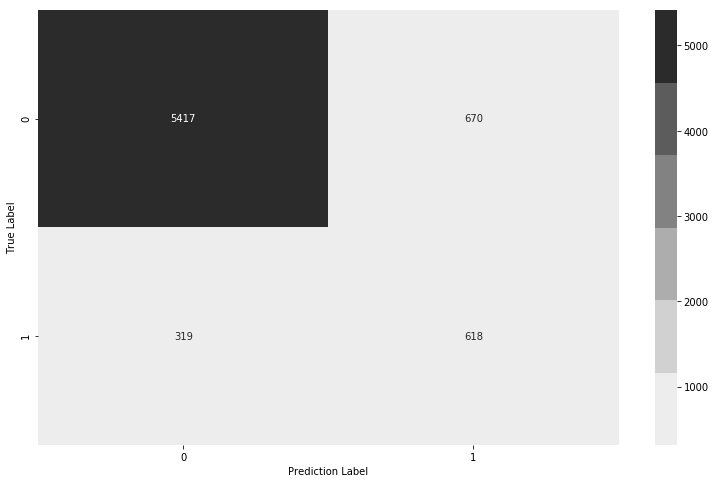

In [57]:
plt.figure(figsize=(13, 8))
sns.heatmap(cnf_matrix, annot=True, cmap=sns.color_palette('Greys'), fmt='1g')
plt.xlabel("Prediction Label")
plt.ylabel("True Label")
plt.show()

### Review of a Confusion Matrix and the calssification evaluation metrics

### [TN, FP]
### [FN, TP]

Precision = # of TP / # of Pred Pos

Recall = # of TP / # of Actual Pos

Accuracy =  of TP + TN / Total Observations

F1 = 2 x (Precision * Recall) / (Precision + Recall)

Since our evaluation of data is on predicting how many people make over 50K (Pos) or under $50K (Neg) let's review the matrix step by step:

TP = This tells us the number of people who make <b>over</b> 50K that we got right.

FN = This tells us the number of people who we thought made <b>over</b> 50K that we got wrong.

FP = This tells us the number of people who we thought made <b>under</b> 50K we got wrong.

TN = This tells us the number of people who make <b>under</b> 50K that we got right.

Pre-outlier cleaning: 

    Precision: 1024 / 1968 = .52

    Recall: 1024 / 1477 = .69

    Accuracy: 6744 / 8141 = .82

    F1: 2 x (.52 * .69) / (.52 + .69) = 2 x (.3588 / 1.21) = .593

Post-outlier cleaning:
    
    Precision: 618 / (618 + 620) = .48
    
    Recall: 618 / (618 + 319) = .66
    
    Accuracy: 6035 / 7024 = .86
    
    F1 = 2 x (.48 * .69) / (.48 + .69) = 2 x (.3312 / 1.17) = .566


### Focus of the Question

**Do we focus precision?**

Well how accurate do we need to be in a census? Does it cost us more to have False Positives? 

Being positive means we mark you as making over 50K so it would not be ideal to falsely classify someone who is below their means into a tax bracket they should not be a part of. 

**Do we focus recall?**

Do we care if we misclassify some who make over 50K as under 50K?

It would be overall less tax money in the system but they would still have the means to pay those unlike people who are misclassified into a higher bracket.

**What about F1?**

Well F1 is the mix of the two where we seek a balance of precision and recall.

It would not be a bad idea to mitigate both lost money from FN and over taxing FP, so we'll be obtaining this score regardless of our option to see what it shows up as.

#### What I think is best

I think we should focus on precision and F1 over recall. The reason being that misclassifying those who cannot pay a higher bracket just ruins lives and can lead to potential lawsuits whereas the opposite with recall is more of a typo on our behalf and can be rectified with further testing. 

#### Results of cleaning out Outliers

Well we seemed to have had a blanekt loss on all metrics aside from accuracy when dropping outliers and that is quite the surprise. I would have thought that dropping such skewed information such as the third standard deviation onward data would actually fix our project more than hurt it but then I considered why this happened to be the case. 

Our original metrics were skewed because we had so many outliers to begin with. So our data is more true to what the predictions of the lay person would be despite losing to our original data set. 

## Model Creation

In [58]:
params = {"penalty": ['l1', 'l2'],
          'tol': [0.001, 0.0001, 0.00001],
          'C': [1, 0.1, 0.01],
          'max_iter': [100, 500, 1000],
          'n_jobs': [-1]}

In [59]:
logreg = LogisticRegression()

In [60]:
gscv = GridSearchCV(logreg, params, n_jobs = -1, verbose = 1)

In [61]:
X_train.shape, y_train.shape

((21070, 101), (21070,))

In [62]:
gscv.fit(X_train, y_train)

C:\Users\Atlas\.conda\envs\New\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 155 out of 162 | elapsed:   12.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   12.7s finished
C:\Users\Atlas\.conda\envs\New\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Atlas\.conda\envs\New\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 0.1, 0.01], 'max_iter': [100, 500, 1000],
                         'n_jobs': [-1], 'penalty': ['l1', 'l2'],
                         'tol': [0.001, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

### Model Results

Well our model is truly middle of the road here. It's best parameters that we have found are:

    c = 1.0
    Max Iter = 100    
    n_jobs = None    
    penalty = l2    
    tolerance = 0.0001

Now that we have this information, let's try and cross validate this with our cross validation set that we cleaned up a long time ago.

In [65]:
# This is where we create dummy columns of 0 and 1's for each variable within those columns listed.

X = pd.get_dummies(df1[x_feats])
y = df1.annual_salary
X.head()

,work_class_Federal-gov,work_class_Local-gov,work_class_Never-worked,work_class_Private,work_class_Self-emp-inc,work_class_Self-emp-not-inc,work_class_State-gov,work_class_Unknown,work_class_Without-pay,education_10th,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [66]:
for col in X.columns:
    X[col] = (X[col] - min(X[col])) / (max(X[col]) - min(X[col]))

In [67]:
X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [68]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
model_log

C:\Users\Atlas\.conda\envs\New\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [70]:
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    9639
1    1756
Name: annual_salary, dtype: int64
0    0.845897
1    0.154103
Name: annual_salary, dtype: float64


In [71]:
#We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.

residuals = y_test - y_hat_test
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

 0    3190
 1     404
-1     205
Name: annual_salary, dtype: int64
 0    0.839695
 1    0.106344
-1    0.053962
Name: annual_salary, dtype: float64


Based on the cross validation data set we are pretty much in a similar ballpark as their data every step of the way. Whereas our data was 85% for both test and train, this data is 84.5% and 84% test and train. 

In [72]:
cnf_matrix = confusion_matrix(y_hat_test, y_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[2750  404]
 [ 205  440]]


Even looking at the confusion matrix we're essentially seeing that there more False Positive and True Positive throughout this data set than the one that we were originally working with. 

In [73]:
params = {"penalty": ['l1', 'l2'],
          'tol': [0.001, 0.0001, 0.00001],
          'C': [1, 0.1, 0.01],
          'max_iter': [100, 500, 1000],
          'n_jobs': [-1]}

In [74]:
logreg = LogisticRegression()

In [75]:
gscv = GridSearchCV(logreg, params, n_jobs = -1, verbose = 1)

In [76]:
X_train.shape, y_train.shape

((11395, 101), (11395,))

In [77]:
gscv.fit(X_train, y_train)

C:\Users\Atlas\.conda\envs\New\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 155 out of 162 | elapsed:    5.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    5.9s finished
C:\Users\Atlas\.conda\envs\New\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Atlas\.conda\envs\New\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 0.1, 0.01], 'max_iter': [100, 500, 1000],
                         'n_jobs': [-1], 'penalty': ['l1', 'l2'],
                         'tol': [0.001, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

And for the moment of truth the cross validation data set values are:

    c = 1.0
    max iter = 100
    n_jobs = None
    penalty = l2
    to = 0.0001
    
So the data that was partitioned early on and the one that we originally worked with both share the same hyperparameters down to a T. Now that we know that I'd like to think that we did the right modelling with our data but there is always room for improvements!

# Conclusion

#### Next Steps

With any project there are constraints found within it that we could have worked on or improved to make the test better overall. I think that there are a few optional items that given enough time I would add to this project. Those options are:

    1. Perform a different machine learning algorithm with the same goal.
    2. Use different feature engineering methods to improve our performance scores.
    3. Refine what columns are used in the machine learning process to see which ones weaken the modelling.

#### Model Results

Regardless of what we could work on to improve the model, what we for sure know is that given our current standing with what we worked on we are able to predict what category of 'tax bracket' you would be 85% of the time based on our data set based on several categories including race, sex, martial status, and occupation. What this means is that we can provide a fairly strong predicted answer to the US government when determining peoples ability to pay taxes and with some refinement and secondary testing we should be able to improve this score immensely. 

Thank you for your time and I hope this project was an interesting read and dive into my thought process.